# HW 2



### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/admissions.csv"
df_raw = pd.read_csv(url)
df_raw.head(5)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
 print len(df_raw)

400


Answer: There are 400 observations. 

#### Question 2. Create a summary table

In [4]:
print df_raw.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [5]:
print df_raw.groupby(['admit']).describe()

                    gpa         gre    prestige
admit                                          
0     count  272.000000  271.000000  273.000000
      mean     3.345404  573.579336    2.641026
      std      0.376773  116.052798    0.917198
      min      2.260000  220.000000    1.000000
      25%      3.080000  500.000000    2.000000
      50%      3.340000  580.000000    3.000000
      75%      3.610000  660.000000    3.000000
      max      4.000000  800.000000    4.000000
1     count  126.000000  127.000000  126.000000
      mean     3.489206  618.897638    2.150794
      std      0.371655  108.884884    0.921455
      min      2.420000  300.000000    1.000000
      25%      3.220000  540.000000    1.000000
      50%      3.545000  620.000000    2.000000
      75%      3.757500  680.000000    3.000000
      max      4.000000  800.000000    4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because there are different units of measurement between GRE and GPA. GPA is on a 4-pt scale and GRE is on a scale from 300 to 800. We would need to standardize the data to understand the relative variability of GRE and GPA. 

#### Question 4. Drop data points with missing data


In [6]:
df_raw.dropna(inplace = True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [7]:
len(df_raw)

397

The length of my new data frame is 3 less than the length of the original, for the 3 missing values for gpa, gre, and prestige. 


#### Question 6. Create box plots for GRE and GPA

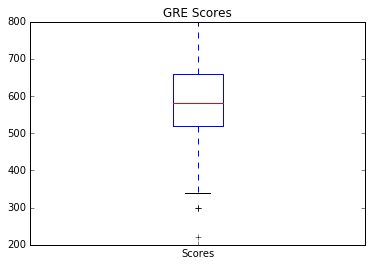

In [8]:
#boxplot 1 GRE
plt.boxplot(df_raw['gre'])
plt.xticks([1], ['Scores'])
plt.title('GRE Scores')
plt.show()


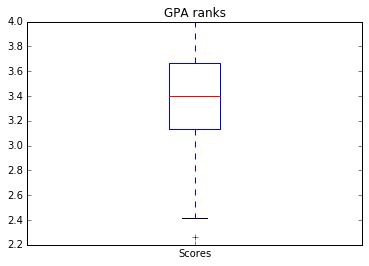

In [9]:
#boxplot 2 GPA
plt.boxplot(df_raw['gpa'])
plt.xticks([1], ['Scores'])
plt.title('GPA ranks')
plt.show()


#### Question 7. What do these plots show?

Answer: There are some outliers in the GRE and GPA data. 

#### Question 8.  If our model had an assumption of a symmetric distribution would we meet that requirement? 

Answer: We would, more or less, once we remove the outliers.

#### Question 9: Add dummy variables for GRE scores. Top 10% are considered very high. next 25% of GRE scores are considered high, next 50% are considered medium and lowest 25% are considered Low. 

In [10]:
mask_veryhigh = (df_raw['gre'] > df_raw['gre'].quantile(0.90)) #91 - 100 is very high

mask_medium = (df_raw.gre >= df_raw.gre.quantile(0.25)) & (df_raw.gre<= df_raw.gre.quantile(0.75)) #25th - 75th med

mask_low = (df_raw['gre'] < df_raw['gre'].quantile(0.25)) #less than 25th is low

df_raw['gre_category'] = 'High' #High is over 75th and up to 90th. Assummed instructions in Q9 above were wrongly stated. 
df_raw.loc[mask_veryhigh,'gre_category'] = 'Very High'
df_raw.loc[mask_medium,'gre_category'] = 'Med'
df_raw.loc[mask_low,'gre_category'] = 'Low'
df_raw.head(10)

,admit,gre,gpa,prestige,gre_category
0,0,380.0,3.61,3.0,Low
1,1,660.0,3.67,3.0,Med
2,1,800.0,4.00,1.0,Very High
3,1,640.0,3.19,4.0,Med
4,0,520.0,2.93,4.0,Med
5,1,760.0,3.00,2.0,Very High
6,1,560.0,2.98,1.0,Med
7,0,400.0,3.08,2.0,Low
8,1,540.0,3.39,3.0,Med
9,0,700.0,3.92,2.0,High


In [11]:
GreDummy = pd.get_dummies(df_raw.gre_category)
del GreDummy['Low']
df_raw = pd.concat([df_raw,GreDummy],axis = 1)
df_raw.head(10)

,admit,gre,gpa,prestige,gre_category,High,Med,Very High
0,0,380.0,3.61,3.0,Low,0.0,0.0,0.0
1,1,660.0,3.67,3.0,Med,0.0,1.0,0.0
2,1,800.0,4.00,1.0,Very High,0.0,0.0,1.0
3,1,640.0,3.19,4.0,Med,0.0,1.0,0.0
4,0,520.0,2.93,4.0,Med,0.0,1.0,0.0
5,1,760.0,3.00,2.0,Very High,0.0,0.0,1.0
6,1,560.0,2.98,1.0,Med,0.0,1.0,0.0
7,0,400.0,3.08,2.0,Low,0.0,0.0,0.0
8,1,540.0,3.39,3.0,Med,0.0,1.0,0.0
9,0,700.0,3.92,2.0,High,1.0,0.0,0.0


#### By a scatterplot explore the association between GRE based on GPA. For each observation, color according to perstige. 

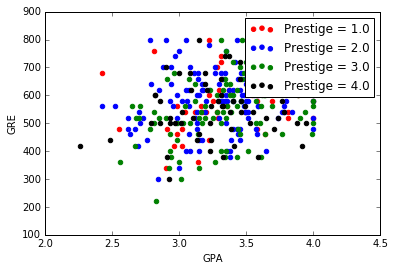

In [12]:
plt.scatter(df_raw[df_raw.prestige == 1.0].gpa, 
            df_raw[df_raw.prestige == 1.0].gre, 
            color = "r", 
            label = "Prestige = 1.0")

plt.scatter(df_raw[df_raw.prestige == 2.0].gpa, 
            df_raw[df_raw.prestige == 2.0].gre, 
            color = "b", 
            label = "Prestige = 2.0")

plt.scatter(df_raw[df_raw.prestige == 3.0].gpa, 
            df_raw[df_raw.prestige == 3.0].gre, 
            color = "g", 
            label = "Prestige = 3.0")

plt.scatter(df_raw[df_raw.prestige == 4.0].gpa, 
            df_raw[df_raw.prestige == 4.0].gre, 
            color = "k", 
            label = "Prestige = 4.0")

plt.legend()
plt.xlabel("GPA")
plt.ylabel("GRE")
plt.show()